## CS 5963 Project

# New York City Schools Survey

## **Group Members**  

Kara Johnson (u0409733) - E-mail: kjohnson@sci.utah.edu   
Sara Johnson (u0884127) - E-mail: sara.l.johnson@utah.edu

### Background and Motivation

Education is an important pillar in our society today. Many parents in America feel dissatisfied with the public school system. The goal of this project is to identify the factors that contribute parent perceptions of their child's school. We will be using New York City as a model, as it has over 400 high schools and has made data from their annual school survey available for analysis. This survey collects responses to a number of questions pertaining to many aspects of education, but we are focusing on trust & family ties, safety, and personal attention & support as indicators of overall parent perception. We will investigate if parent perception of these aspects differ as a function of the school's location or educational opportunities. By generating this predictive model, we can determine how to improve parent perceptions of schools in the future.

### Project Objectives

**Objective 1.** We will be looking at the positive response rates that pertain to three "Educational Elements": Parent trust in the school, parent involvement, and parent response rate
    - How do these elements relate to each other?
    - How do these elements relate to the opportunities available at these schools (extracurriculars, AP classes, CTE)? 
    - How do these elements differ between boroughs and/or districts?   
**Objective 2.** Is student perception of school safety a confounder in parent perception of their student's school?

**Objective 3.** What are the factors that could potentially improve parent perceptions of our education system? 
    - Can you predict the percentage of positive responses with AP, extracurriculars, and percentage of positive student answers? 


### Data

We are collecting and combining two datasets: the 2016 New York City School Survey, which collects student and parent responses to surveys about their school, and the High Schools At A Glance, which includes information about high school programs, Advanced Placement (AP) courses, and career training programs. These datasets are in Excel spreadsheet format.

2016 New York City School Survey: http://schools.nyc.gov/Accountability/tools/survey/default.htm   
High Schools At a Glance: http://schools.nyc.gov/ChoicesEnrollment/High/Resources/default.htm

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
 
# High Schools At a Glance - Data import
schools = pd.read_csv('HSAAG_data/HSAAG_Schools.csv', encoding='latin-1',header=0)
programs = pd.read_csv('HSAAG_data/HSAAG_Programs.csv', encoding='latin-1',header=1)
AP = pd.read_csv('HSAAG_data/HSAAG_APcourses.csv', encoding='latin-1',header=1)
CTE = pd.read_csv('HSAAG_data/HSAAG_CTEprograms.csv', encoding='latin-1',header=1)
transport = pd.read_csv('HSAAG_data/HSAAG_Transportation.csv', encoding='latin-1',header=0)



### Data Processing

For the survey dataset, we will first hand pick questions that will serve as measures of the three education elements (Trust & Family Ties, Safety, and Personal Attention & Support). We will need the following data for each question:
    - Total number of responses
    - Percentage of responses that are positive (Agree/Strongly Agree) or negative (Disagree/Strongly Disagree)   
    (Note: the percentage of "I don't know" responses are not included in this analysis.).
    - Parent response rate for each school

We will also need to remove all schools that do not correlate with the "High School At a Glance" dataset. This will be performed by matching the school's unique DBN number provided in both datasets.   

We will also extract other variables that we will use for performing our analysis, which are found in the "High School At a Glance" dataset. These variables may include admissions method, interest area, number of AP courses offered, and whether or not the school has career training programs. For any categorical data, we will assign a number to each category. 



#### HSAAG - Extract columns, clean data, and combine into a dataframe

In [2]:
# 1. Schools dataframe
schools.columns = ['rmv','School Name', 'DBN','Borough','Number of Programs','rmv2','rmv3', 'Neighborhood',
                   'Graduation Rate','Attendance Rate', '% students who feel safe','AP Courses y/n',
                   'rmv7', 'CTE y/n','rmv4', 'rmv5', 'rmv6']
school_cols = ['School Name', 'DBN', 'Borough', 'Number of Programs','Neighborhood', 'Graduation Rate', 
               'Attendance Rate','% students who feel safe', 'AP Courses y/n','CTE y/n']

schoolsDF = schools[school_cols]

# Change 'Graduation Rate', 'Attendance Rate', and '% students who feel safe' to decimals

schoolsDF['Graduation Rate'] = schoolsDF['Graduation Rate'].str.replace('%','').astype(float).apply(lambda x: x/100);
schoolsDF['Attendance Rate'] = schoolsDF['Attendance Rate'].str.replace('%','').astype(float).apply(lambda x: x/100);
schoolsDF['% students who feel safe'] = schoolsDF['% students who feel safe'].str.replace('%','').astype(float).apply(lambda x: x/100);

# Change Yes to 1. NaNs in this dataset correspond to 'No', so set NaNs to 0
# Index to DBN for easy comparison and merging of dataframes
schoolsDF = schoolsDF.fillna(0).replace('Yes',1).set_index('DBN')


/Users/karajohnson/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/karajohnson/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/karajohnson/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

In [3]:
# 2. AP classes dataframe
AP.columns = ['rmv', 'School Name', 'DBN', 'Arts', 'English', 'Government', 'History', 'Languages', 'Math', 'Science',
             'Social Science', 'rmv2', 'rmv3', 'rmv4','rmv5', 'rmv6']
AP_cols = ['School Name', 'DBN', 'Arts', 'English', 'Government', 'History', 'Languages', 'Math', 'Science',
           'Social Science']
AP_DF = AP[AP_cols].fillna(0).set_index('DBN')


In [4]:
# 3. CTE programs dataframe
CTE.columns = ['rmv', 'School Name', 'DBN', 'rmv2','Agriculture, Food and Natural Resources',
               'Architecture and Construction', 'Arts, A/V Technology & Communication',
               'Business, Management & Administration','Education and Training','Government and Public Administration', 'Health Science',
               'Hospitality and Tourism', 'Human Services', 'Information Technology','Law and Public Safety', 
               'Manufacturing Production','Marketing, Sales & Service', 'Recording Arts Technology/Technician',
               'Scientific Research and Engineering','Transportation, Distribution & Logistics']
CTE_cols = ['School Name', 'DBN','Agriculture, Food and Natural Resources',
            'Architecture and Construction', 'Arts, A/V Technology & Communication',
            'Business, Management & Administration','Government and Public Administration', 
            'Health Science','Hospitality and Tourism','Information Technology',
            'Law and Public Safety','Manufacturing Production','Marketing, Sales & Service',
            'Recording Arts Technology/Technician','Scientific Research and Engineering',
            'Transportation, Distribution & Logistics']
CTE_DF = CTE[CTE_cols].set_index('DBN').fillna(0)


### Exploratory Analysis

First, we will make a scatter matrix and correlation matrix to identify any promising correlations. We will also calculate descriptive statistics of the variables to (1) make sure that the values are reasonable and (2) identify any interesting attributes. We will also make some preliminary 3-D cluster plots and an overlay of pertinent variables on top of a New York City map.


                          Number of Programs  Graduation Rate  \
Number of Programs                  1.000000         0.105434   
Graduation Rate                     0.105434         1.000000   
Attendance Rate                     0.021427         0.401122   
% students who feel safe           -0.163616         0.154492   

                          Attendance Rate  % students who feel safe  
Number of Programs               0.021427                 -0.163616  
Graduation Rate                  0.401122                  0.154492  
Attendance Rate                  1.000000                  0.262324  
% students who feel safe         0.262324                  1.000000  


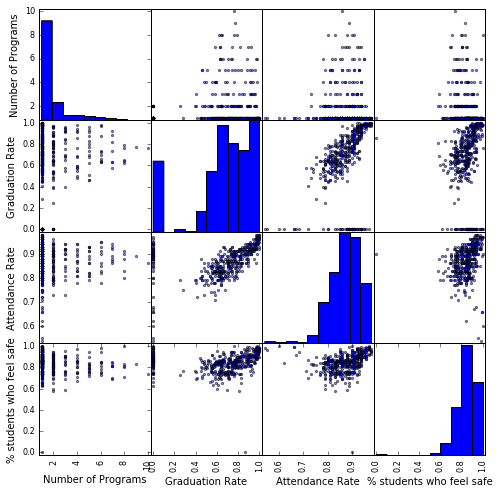

In [14]:
# Correlation matrix
cols2 = ['Number of Programs','Graduation Rate','Attendance Rate','% students who feel safe']
print(schoolsDF[cols2].corr())
pd.scatter_matrix(schoolsDF[cols2],figsize=(8, 8), diagonal='hist');

### Analysis Methodology

For Objective 1:
We will use multilinear regression to determine if there is any significant relationship between the three educational elements, i.e. if the answers to the questions pertaining to each element are correlated to one another. We will also use multilinear regression to determine if there is any significant relationship between the parents' perception of these elements and the opportunities available at the schools, i.e. if the answers to the questions pertaining to each element are correlated to the number of extracurricular activites, AP classes, and career training programs.

For Objective 2:
Using the multilinear regression models from Objective 1, we might be able to determine if safety perception is a confounder for parent trust in the school, involvement, and response rate.     

For Objective 3: 
After performing multilinear regression, we will take the most significant variables and use the to build a model using a decision tree and support vector machines to predict positive parent response rates. To determine if there is a dependence of parent response on school location, we will add school boroughs and districts to determine which, if either, improves the predictive model.


### Project Schedule

Week 1 (Friday, Nov 4): Experiment with how to clean Excel datasets in Pandas. Pertinent data extracted from Excel and stored into Pandas dataframe(s).   

Week 2 (Friday, Nov 11): Pandas data cleaned, have visuals generated for exploratory analysis. Reevaluate final analysis and make changes as needed.

Week 3 (Friday, Nov 18): **Submit Project Milestone** Perform analysis for Objective 1 and Objective 2.

Week 4 (Friday, Nov 25): Perform analysis for Objective 3. Make final visualizations, format Jupyter Notebook, begin compilings for our video.   

Week 5 (Friday, Dec 2): Record video, **Submit Final Project**.
